# Announcements
- Problem Set 6 will be on finite difference methods, due Nov 2 (to be posted on D2L).
- __Outlook__: Finite difference methods application to ODEs and PDEs. Then on to Monte Carlo Markov Chain methods.
- Conference for Undergraduate Women in Physics: online event in 2021, [applications accepted until 10/25](https://www.aps.org/programs/women/cuwip/)
- TIMESTEP on 10/21 at 5pm: Grad School Application Process [details + zoom registration](https://lavinia.as.arizona.edu/~timestep/) **This afternoon**

*Note:  The presentation below largely follows part I in "Finite Difference Methods for Ordinary and Partial Differential Equations" by LeVeque (SIAM, 2007).*

# Finite Difference Methods Breakout
Lecture 23 introduced the _Finite Difference_ method and we used it to solve a boundary value problem with Dirichlet conditions as a linear system. In today's breakout, we will adapt this to Neumann boundary conditions. 

Recall that we incorporated Dirichlet conditions by  by sending the values we know to the $b$ vector:
$$\begin{aligned}
    \frac{U_a - 2 U_1 + U_2}{\Delta x^2} = f(x_1) &\Rightarrow& \frac{- 2 U_1 + U_2}{\Delta x^2} = f(x_1) - \frac{U_a}{\Delta x^2} \\
    \frac{U_4 - 2 U_5 + U_b}{\Delta x^2} = f(x_1) &\Rightarrow& \frac{U_4 - 2 U_5}{\Delta x^2} = f(x_5) - \frac{U_b}{\Delta x^2}
\end{aligned}$$
so that final system looked like
$$\color{red}{\text{Dirichlet:}}\quad\quad
    \frac{1}{\Delta x^2} \begin{bmatrix}
    -2 &  1 &    &    &    \\
     1 & -2 &  1 &    &    \\
       &  1 & -2 &  1 &    \\
       &    &  1 & -2 &  1 \\
       &    &    &  1 & -2 \\
    \end{bmatrix} \begin{bmatrix}
        U_1 \\ U_2 \\ U_3 \\ U_4 \\ U_5
    \end{bmatrix} = 
    \begin{bmatrix}
        f(x_1) - \frac{U_a}{\Delta x^2} \\ f(x_2) \\ f(x_3) \\ f(x_4) \\ f(x_5) - \frac{U_b}{\Delta x^2} \\
    \end{bmatrix}.
$$

In order to handle Neumann boundary conditions, we need to modifythe linear system as we can't simply add the boundary conditions on the right hand side anymore.  Instead a **ghost cell** approach is often used.  These **ghost cells** are added unknowns that represent the boundary values that we actually know.  

## Example Problem
For example, if we have a BVP
$$
    u_{xx} = e^x, \quad x \in [-1, 1] \quad \text{with} \quad u(-1) = 3, \text{ and } u_x(1) = -5
$$
then we could keep the boundary values in the vector of unknowns so that now
$$
    U = \begin{bmatrix} U_0 \\ U_1 \\ \vdots \\ U_N \\ U_{N+1} \end{bmatrix}
$$
where here $U_0$ and $U_{N+1}$ are actually the boundary points.  

The matrix $A$ is then modified to have the appropriate relationships.  In this case the left boundary condition leads to
$$
    A = \begin{bmatrix}
  1 &    &    &    &    &    \\
  \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} &    &    &    \\
    &  \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} &    &    \\
    & & \ddots & \ddots & \ddots
    \end{bmatrix} \quad \text{and} \quad b = \begin{bmatrix}
        u(a) \\ f(x_1) \\ f(x_2) \\ \vdots
    \end{bmatrix}
$$
which multiplied out simply gives
$$
    U_0 = u(-1) = 3.
$$

<span style="color:blue"> Derive $A$ and $b$ for the right (Neumann) boundary condition $u_x(b) = -5$ using the second order backward finite difference approximation for the first derivative $$u'(x_i) \approx \frac{3 u(x_i) - 4 u(x_{i-1}) + u(x_{i - 2})}{2.0 \Delta x}\,.$$</span>

Apply the second order backward finite difference approximation for the first derivative at $x=b$:

$$
    u_x(b) \approx \frac{3 U_{N+1} - 4 U_{N} + U_{N - 1}}{2.0 \Delta x} = -5
$$
This can be incorporated into the matrix $A$ and vector $b$ as
$$
    A =  \begin{bmatrix}
     \ddots & \ddots & \ddots &    &    \\
            & \frac{1}{\Delta x^2} &     \frac{-2}{\Delta x^2}&  \frac{1}{\Delta x^2} &    \\
            &        &      \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} \\
            &        &      \frac{1}{2 \Delta x} &  \frac{-4}{2 \Delta x} &  \frac{3}{2 \Delta x} \\
    \end{bmatrix} ~~~~ \text{and} ~~~~ b = \begin{bmatrix}
        \vdots \\ f(x_N) \\ u_x(b)
    \end{bmatrix}.
$$

<span style="color:blue"> **Solve today's BVP via the construction of a linear system of equations.**</span>

<span style="color:blue"> Eventually, you will want find the true solution for overplotting, but I recommend working on the numeric solution first as that's the interesting part.</span>

\begin{align*}
    u(x) &= A x + B + e^x \\
    u_x(1) &= A + e^1 = -5 \Rightarrow A = -5 - e \\
    u(-1) &= (5 + e) + B + e^{-1} = 3 \Rightarrow B = 3 - 5 - e - e^{-1} = -(2 + e + e^{-1}) \\
    ~\\
    u(x) &= -(5 + e) x -(2 + e + e^{-1}) + e^{x}
\end{align*}

_The code below is copied from Lecture 23. The missing parts need to be adapted to today's problem, but you may find looking back at Lecture 23 helpful._

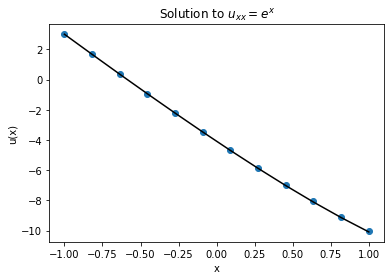

In [3]:
import numpy
import matplotlib.pyplot as plt
# Problem setup
a = -1.0
b = 1.0
u_a = 3.0
u_x_b = -5.0
f = lambda x: numpy.exp(x)
#code up your analytic solution here
u_true = lambda x: -(5.0 + numpy.exp(1.0)) * x - (2.0 + numpy.exp(1.0) + numpy.exp(-1.0)) + numpy.exp(x)
# Discretization
N = 10
x_bc = numpy.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Construct matrix A - without boundary conditions
A = numpy.zeros((N + 2, N + 2))
diagonal = numpy.ones(N + 2) / delta_x**2
A += numpy.diag(diagonal * -2.0, 0)
A += numpy.diag(diagonal[:-1], 1)
A += numpy.diag(diagonal[:-1], -1)

# Construct RHS - without boundary conditions
b = f(x_bc)

# Now, add boundary conditions to A
A[0, 0] = 1.0
A[0, 1] = 0.0
A[-1, -1] = 3.0 / (2.0 * delta_x)
A[-1, -2] = -4.0 / (2.0 * delta_x)
A[-1, -3] = 1.0 / (2.0 * delta_x)

# Now, add boundary conditions to b
b[0] = u_a
b[-1] = u_x_b

# Solve system
U = numpy.empty(N + 2)
U = numpy.linalg.solve(A, b)

# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()